In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-14 04:57:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.0MB/s    in 5.6s    

2024-03-14 04:57:24 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
#Let's see how many images are there in each folder

import os

#Let's start with the train data

#number of pizza train images
num_pizza_train_images = len(os.listdir("pizza_steak/train/pizza"))

#number of steak train images
num_steak_train_images = len(os.listdir("pizza_steak/train/steak"))

#number of pizza test images
num_pizza_test_images = len(os.listdir("pizza_steak/test/pizza"))

#number of steak test images
num_steak_test_images = len(os.listdir("pizza_steak/test/steak"))

num_pizza_train_images, num_steak_train_images, num_pizza_test_images, num_steak_test_images

(750, 750, 250, 250)

In [2]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


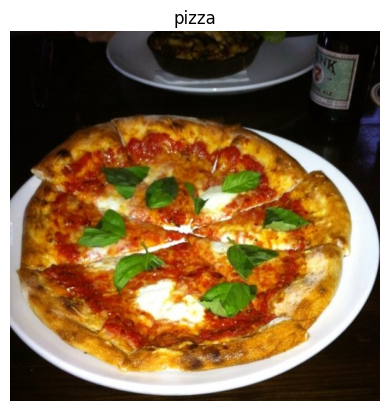

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[15, 11,  8],
        [15, 11,  8],
        [16, 12,  9],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[15, 11,  8],
        [15, 11,  8],
        [15, 11,  8],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[14, 10,  7],
        [14, 10,  7],
        [15, 11,  8],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       ...,

       [[11,  6,  0],
        [11,  6,  0],
        [11,  6,  0],
        ...,
        [26, 16,  7],
        [23, 13,  4],
        [20, 10,  1]],

       [[10,  5,  0],
        [10,  5,  0],
        [10,  5,  0],
        ...,
        [29, 16,  8],
        [27, 14,  6],
        [25, 12,  4]],

       [[10,  5,  0],
        [10,  5,  0],
        [10,  5,  0],
        ...,
        [27, 14,  6],
        [27, 14,  6],
        [26, 13,  5]]], dtype=uint8)
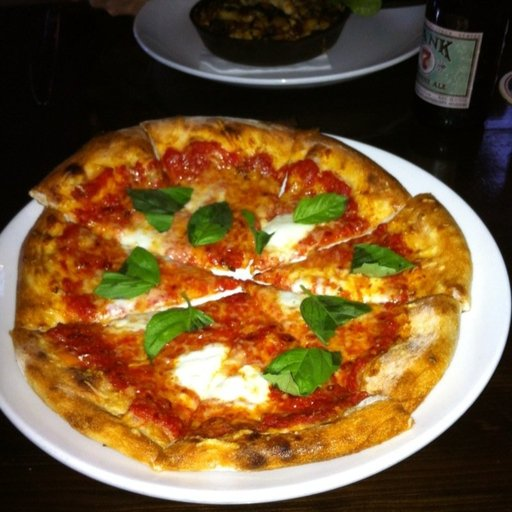

In [7]:
img

In [7]:
img.shape

(512, 512, 3)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
#set the seed
tf.random.set_seed(101)

#Preprocess all of the data and scale them between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Store the directories of the images in variables
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import the data from the directories and convert them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=101)

valid_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              seed=101)

#Create a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

#Compile the model
model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

#Fit the model
history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 0.5701 - accuracy: 0.6973 - val_loss: 0.4133 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.4475 - accuracy: 0.7987 - val_loss: 0.3757 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.4228 - accuracy: 0.8073 - val_loss: 0.4387 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.3702 - accuracy: 0.8440 - val_loss: 0.3507 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3120 - accuracy: 0.8693 - val_loss: 0.3643 - val_accuracy: 0.8300


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [11]:
train_data

In [12]:
#Try previous Fashion MNIST neural network on this food data

tf.random.set_seed(101)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

#Fit model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 4.8381 - accuracy: 0.5013 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6935 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#Try improving model_2 with more layers and neurons

tf.random.set_seed(101)

#Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

#Fit model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 35.3820 - accuracy: 0.5520 - val_loss: 0.8351 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6047 - accuracy: 0.7180 - val_loss: 0.5702 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5434 - accuracy: 0.7453 - val_loss: 0.5490 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5310 - accuracy: 0.7633 - val_loss: 0.6599 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.5685 - accuracy: 0.7613 - val_loss: 0.6342 - val_accuracy: 0.6820


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


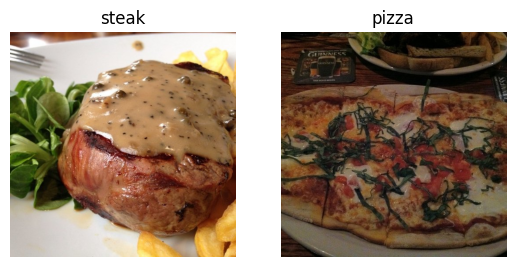

In [10]:
#We now break down our CNN into steps.

#Step 1 - Become one with the data - visualize, visualize, visualize!!!

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
plt.subplot(1,2,2)
pizza_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [8]:
#Step 2 - Preprocess the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir, test_dir

('/content/pizza_steak/train', '/content/pizza_steak/test')

In [9]:
#Load the data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
images, labels = train_data.next()

len(images), len(labels)

(32, 32)

In [14]:
images[7], images[7].shape

(array([[[0.20000002, 0.10980393, 0.07843138],
         [0.26666668, 0.1764706 , 0.14509805],
         [0.21568629, 0.1254902 , 0.10196079],
         ...,
         [0.15686275, 0.19215688, 0.2509804 ],
         [0.15294118, 0.20000002, 0.25490198],
         [0.19215688, 0.2392157 , 0.29411766]],
 
        [[0.23137257, 0.14117648, 0.10980393],
         [0.20784315, 0.11764707, 0.09411766],
         [0.21568629, 0.13725491, 0.10980393],
         ...,
         [0.13333334, 0.16862746, 0.227451  ],
         [0.15294118, 0.18823531, 0.24705884],
         [0.16470589, 0.20000002, 0.25882354]],
 
        [[0.227451  , 0.14901961, 0.1137255 ],
         [0.20000002, 0.12156864, 0.09411766],
         [0.21960786, 0.13725491, 0.11764707],
         ...,
         [0.16470589, 0.19215688, 0.25490198],
         [0.15686275, 0.18431373, 0.24705884],
         [0.15294118, 0.18823531, 0.25490198]],
 
        ...,
 
        [[0.15294118, 0.14509805, 0.15686275],
         [0.08627451, 0.07843138, 0.09019

In [15]:
labels, labels.shape

(array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
       dtype=float32),
 (32,))

In [2]:
#Step 3 - Build the baseline CNN model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

In [25]:
#Create a CNN model

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           input_shape = (224,224,3),
           activation="relu"),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])


In [26]:
#Compile model

model_4.compile(optimizer = Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [27]:
#Fit the model

history_4 = model_4.fit(train_data,
            epochs = 5,
            validation_data = test_data,
            steps_per_epoch = len(train_data),
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.5895 - accuracy: 0.6800 - val_loss: 0.4311 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 91s 2s/step - loss: 0.4587 - accuracy: 0.7947 - val_loss: 0.4682 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 91s 2s/step - loss: 0.3668 - accuracy: 0.8433 - val_loss: 0.3924 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 91s 2s/step - loss: 0.2038 - accuracy: 0.9307 - val_loss: 0.4104 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 91s 2s/step - loss: 0.0779 - accuracy: 0.9807 - val_loss: 0.5752 - val_accuracy: 0.7920


In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 216, 216, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 466560)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 466561    
                                                                 
Total params: 469571 (1.79 MB)
Trainable params: 46957

<Axes: >

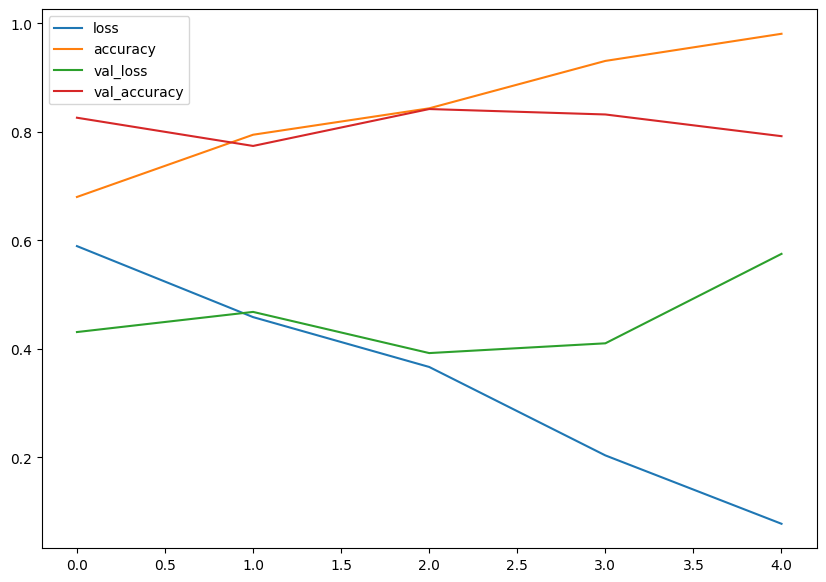

In [29]:
#Step 4 - Evaluate the model

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [31]:
history_4.history

{'loss': [0.5894782543182373,
  0.4586571455001831,
  0.36679065227508545,
  0.20384979248046875,
  0.07788277417421341],
 'accuracy': [0.6800000071525574,
  0.7946666479110718,
  0.8433333039283752,
  0.9306666851043701,
  0.9806666374206543],
 'val_loss': [0.4311286211013794,
  0.4682297110557556,
  0.39237794280052185,
  0.41037517786026,
  0.5751748085021973],
 'val_accuracy': [0.8259999752044678,
  0.7739999890327454,
  0.8420000076293945,
  0.8320000171661377,
  0.7919999957084656]}

In [33]:
range(len(history_4.history['loss']))

range(0, 5)

In [13]:
#Helper function to separate the loss and accuracy curves
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #loss
  plt.figure()
  plt.plot(epochs,train_loss,label="Training loss")
  plt.plot(epochs,val_loss,label="Validation loss")
  plt.title("Loss curves")
  plt.xlabel("Epochs")
  plt.legend()

  #accuracy
  plt.figure()
  plt.plot(epochs,train_accuracy,label="Training accuracy")
  plt.plot(epochs,val_accuracy,label="Validation accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend()


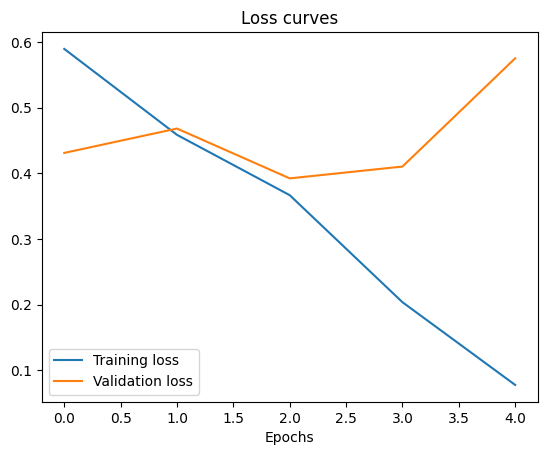

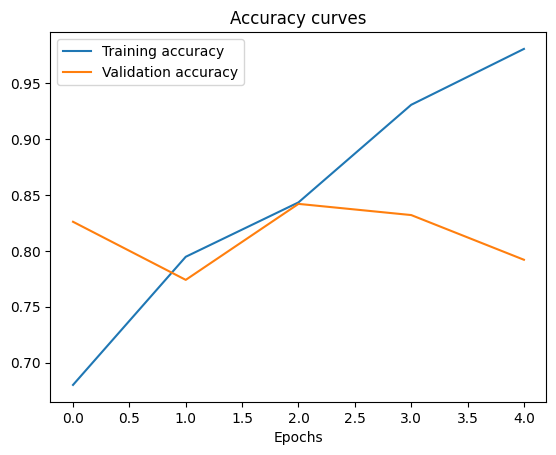

In [37]:
plot_loss_accuracy(history_4)

In [38]:
#Our curves above show symptoms of overfitting
"""
  Overfitting occurs due to:
  - Increase in no. of Conv layers
  - Increase in no. of Conv filters
  - Increase in no. of Dense layers after flattening

  Ways to overcome overfitting:
  - Data Augmentation
  - More data
  - Regularization(eg. MaxPool2D)
  🔑 - Regularization refers to the process of overcoming/reducing overfitting
"""

'\n  Overfitting occurs due to:\n  - Increase in no. of Conv layers\n  - Increase in no. of Conv filters\n  - Increase in no. of Dense layers after flattening\n\n  Ways to overcome overfitting:\n  - Data Augmentation\n  - More data\n  - Regularization(eg. MaxPool2D)\n'

In [11]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [10]:
#Try 1 - Try to reduce overfitting using regularization

tf.random.set_seed(101)
#Create model
model_5 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape=[224,224,3],
           activation='relu'),
    MaxPool2D(pool_size=2,
              padding = 'valid'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#Compile model

model_5.compile(optimizer = Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

In [11]:
#Fit the model

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 56s 1s/step - loss: 0.6579 - accuracy: 0.6100 - val_loss: 0.5434 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.5099 - accuracy: 0.7473 - val_loss: 0.4244 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 53s 1s/step - loss: 0.4474 - accuracy: 0.8033 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 49s 1s/step - loss: 0.4132 - accuracy: 0.8233 - val_loss: 0.3602 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 49s 1s/step - loss: 0.3985 - accuracy: 0.8247 - val_loss: 0.3559 - val_accuracy: 0.8440


In [12]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

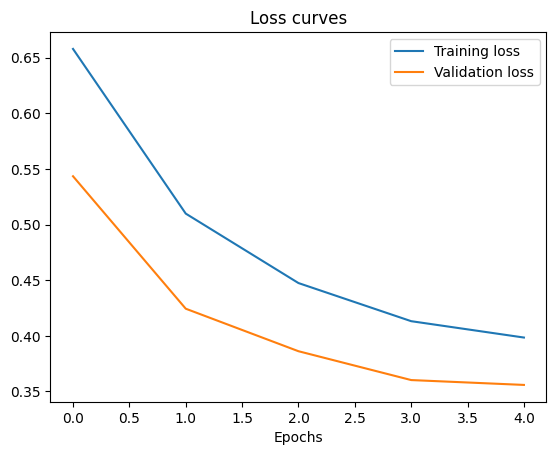

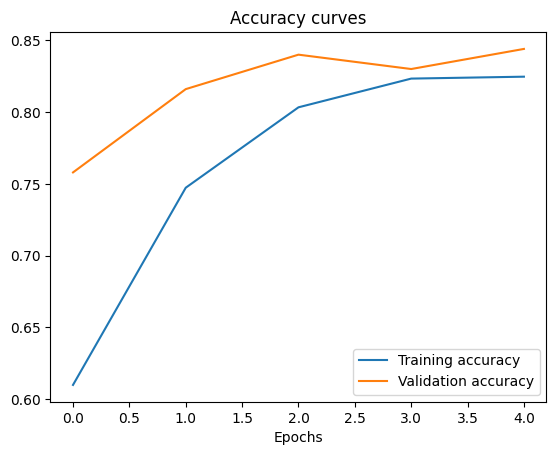

In [15]:
plot_loss_accuracy(history_5)

In [8]:
#Try 2 - try to reduce overfitting using data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True
                                             )

In [12]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = [224,224],
                                               class_mode = "binary",
                                               batch_size=32,
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = [224,224],
                                             class_mode = "binary",
                                             batch_size = 32
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = [224,224],
                                                                   class_mode = "binary",
                                                                   batch_size=32,
                                                                   shuffle=False)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [13]:
len(train_data), len(train_data_augmented), len(test_data)

(47, 47, 16)

In [13]:
train_images, train_labels = train_data.next()

train_images_augmented, train_labels_augmented = train_data_augmented.next()

test_images, test_labels = test_data.next()

Showing random image number  1


Text(0.5, 1.0, 'Augmented Image')

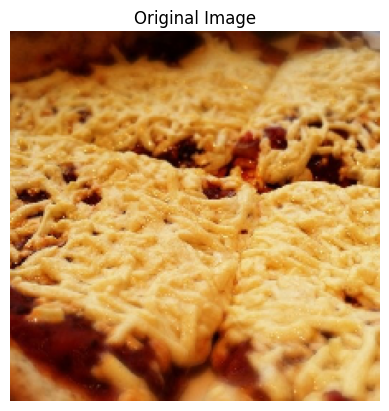

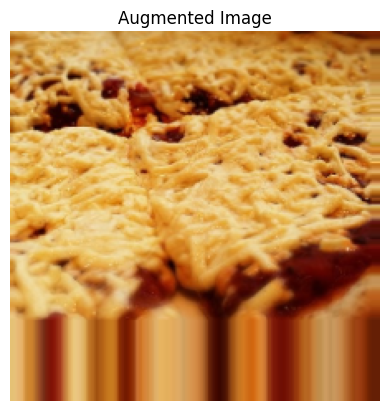

In [14]:
import random
import matplotlib.pyplot as plt

rn = random.randint(0,32) #random number generator

print("Showing random image number ",rn)
plt.figure()
plt.imshow(train_images[rn])
plt.axis(False)
plt.title("Original Image")

plt.figure()
plt.imshow(train_images_augmented[rn])
plt.axis(False)
plt.title("Augmented Image")


In [15]:
#Shuffle the data before building the model to get better results. Otherwise it will learn all pizza images first and then steak, so won't learn properly.
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = [224,224],
                                               class_mode = "binary",
                                               batch_size=32,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = [224,224],
                                             class_mode = "binary",
                                             batch_size = 32
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = [224,224],
                                                                   class_mode = "binary",
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [18]:
#Create a model

model_6 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape=[224,224,3],
           activation='relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

#Compile model
model_6.compile(optimizer = Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])


In [19]:
#Fit model_6

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 511ms/step - loss: 0.6767 - accuracy: 0.5567 - val_loss: 0.6481 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5759 - accuracy: 0.6987 - val_loss: 0.4413 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 21s 458ms/step - loss: 0.5360 - accuracy: 0.7453 - val_loss: 0.4059 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 23s 495ms/step - loss: 0.5132 - accuracy: 0.7567 - val_loss: 0.3870 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 22s 450ms/step - loss: 0.5275 - accuracy: 0.7427 - val_loss: 0.4402 - val_accuracy: 0.8020


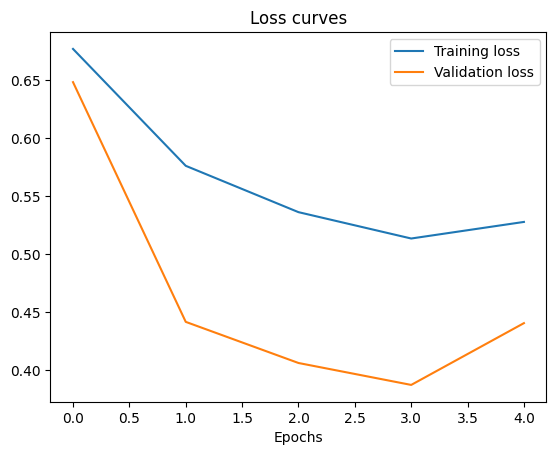

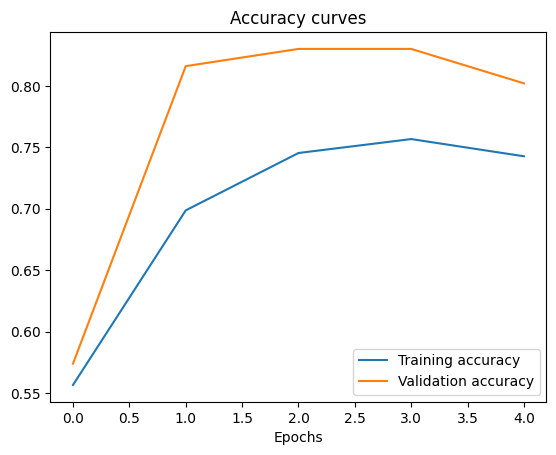

In [20]:
plot_loss_accuracy(history_6)

In [ ]:
"""
  We can improve out model by -
  1. Adding more Conv2D and MaxPool2D layers
  2. Add more filters
  3. Add more data
  4. Transfer learning
  5. Increase no. of epochs
  6. Increase learning rate
"""

In [18]:
#Create a model

model_7 = Sequential([
    Conv2D(filters = 32,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape=[224,224,3],
           activation='relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

#Compile model
model_7.compile(optimizer = Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

In [19]:
#Fit model_7

history_7 = model_7.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented),
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 30s 500ms/step - loss: 0.6336 - accuracy: 0.6407 - val_loss: 0.4941 - val_accuracy: 0.7640
Epoch 2/10
47/47 [==============================] - 21s 439ms/step - loss: 0.5457 - accuracy: 0.7233 - val_loss: 0.4022 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 22s 464ms/step - loss: 0.5022 - accuracy: 0.7587 - val_loss: 0.3735 - val_accuracy: 0.8260
Epoch 4/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4843 - accuracy: 0.7747 - val_loss: 0.3761 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 21s 443ms/step - loss: 0.4722 - accuracy: 0.7840 - val_loss: 0.4850 - val_accuracy: 0.7500
Epoch 6/10
47/47 [==============================] - 23s 478ms/step - loss: 0.4533 - accuracy: 0.7947 - val_loss: 0.3309 - val_accuracy: 0.8700
Epoch 7/10
47/47 [==============================] - 22s 461ms/step - loss: 0.4262 - accuracy: 0.8167 - val_loss: 0.3490 - val_accuracy: 0.8540

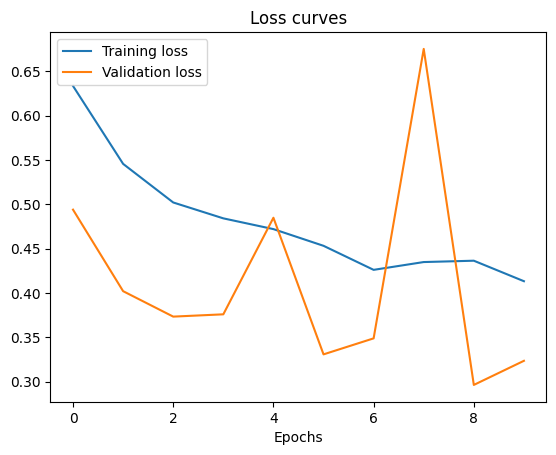

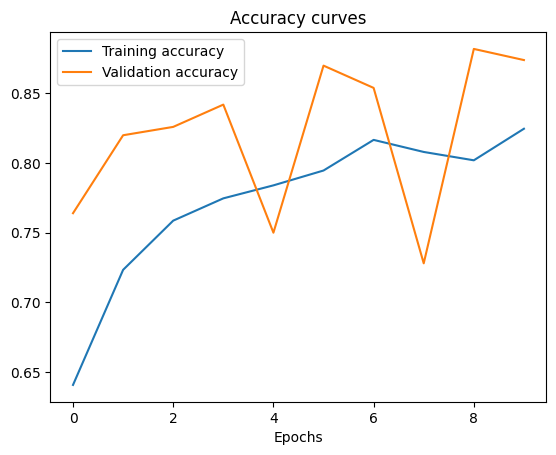

In [21]:
plot_loss_accuracy(history_7)

In [22]:
#Create a model

model_8 = Sequential([
    Conv2D(filters = 32,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape=[224,224,3],
           activation='relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

#Compile model
model_8.compile(optimizer = Adam(learning_rate = 0.01),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

In [23]:
#Fit model_8

history_8 = model_8.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented),
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 453ms/step - loss: 0.7324 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 22s 472ms/step - loss: 0.6936 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 21s 458ms/step - loss: 0.6933 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 21s 454ms/step - loss: 0.6935 - accuracy: 0.4827 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 21s 444ms/step - loss: 0.6938 - accuracy: 0.4813 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 21s 447ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 21s 458ms/step - loss: 0.6933 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000

In [21]:
#Create a model

model_9 = Sequential([
    Conv2D(filters = 64,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape=[224,224,3],
           activation='relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

#Compile model
model_9.compile(optimizer = Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

In [22]:
#Fit model_9

history_9 = model_9.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented),
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 28s 511ms/step - loss: 0.6385 - accuracy: 0.6180 - val_loss: 0.4435 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 22s 460ms/step - loss: 0.5476 - accuracy: 0.7353 - val_loss: 0.5019 - val_accuracy: 0.7580
Epoch 3/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5352 - accuracy: 0.7467 - val_loss: 0.3680 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5128 - accuracy: 0.7607 - val_loss: 0.3967 - val_accuracy: 0.8460
Epoch 5/10
47/47 [==============================] - 24s 511ms/step - loss: 0.4720 - accuracy: 0.7927 - val_loss: 0.3722 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 23s 481ms/step - loss: 0.4654 - accuracy: 0.7927 - val_loss: 0.3259 - val_accuracy: 0.8620
Epoch 7/10
47/47 [==============================] - 23s 488ms/step - loss: 0.4519 - accuracy: 0.8040 - val_loss: 0.3233 - val_accuracy: 0.8460

In [23]:
model_9.evaluate(test_data)

16/16 [==============================] - 2s 92ms/step - loss: 0.2758 - accuracy: 0.8920


[0.27579018473625183, 0.8920000195503235]

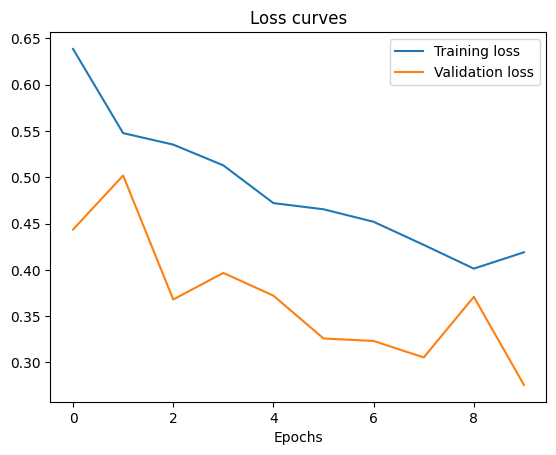

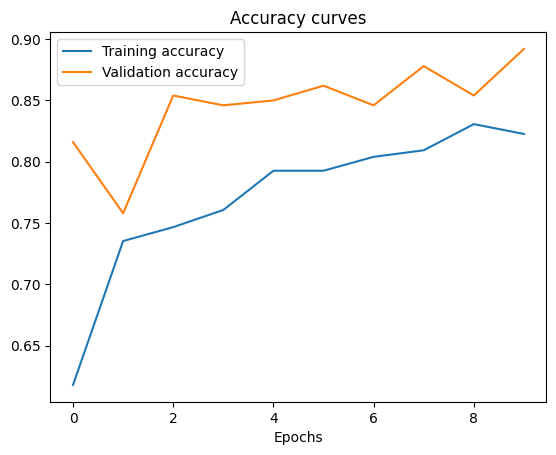

In [24]:
plot_loss_accuracy(history_9)

--2024-03-14 05:25:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-03-14 05:25:58 (119 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

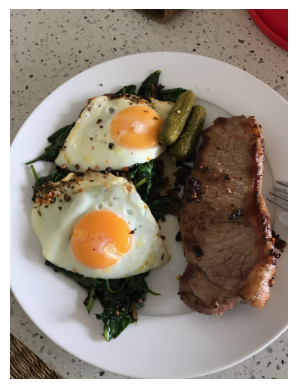

In [26]:
#Now let's make a prediction with a custom image using model_9 which is evidently our best performing model

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [27]:
steak.shape #need to reshape

(4032, 3024, 3)

In [3]:
def load_preprocess_img(filename, img_shape = 224):
  """
  Helper function to load and preprocess a custom image
  """
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img,channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.

  return img

In [39]:
steak = load_preprocess_img("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [42]:
model_9.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 1s 840ms/step


array([[0.913013]], dtype=float32)

In [43]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [44]:
class_names[int(tf.round(model_9.predict(tf.expand_dims(steak, axis=0))))]

1/1 [==============================] - 0s 29ms/step


'steak'

In [4]:
def make_pred(model, filename, class_names):
  img = load_preprocess_img(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


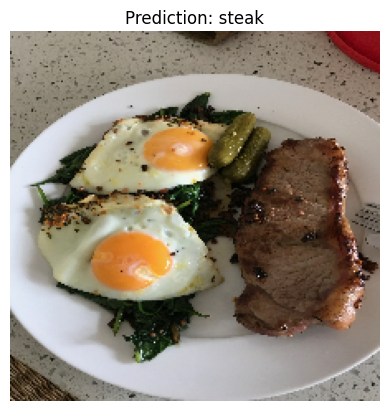

In [48]:
#Finally testing our model_9 on a custom image

make_pred(model_9, "03-steak.jpeg",class_names)

(-0.5, 1199.5, 674.5, -0.5)

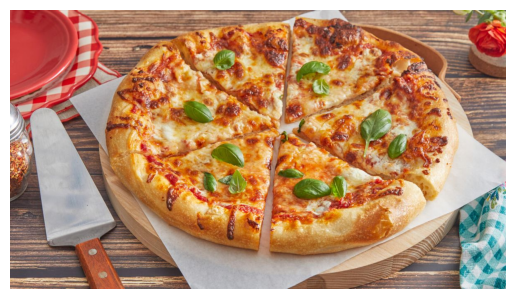

In [52]:
pizza = mpimg.imread("cheese_pizza.jpg")

plt.imshow(pizza)
plt.axis(False)

1/1 [==============================] - 0s 18ms/step


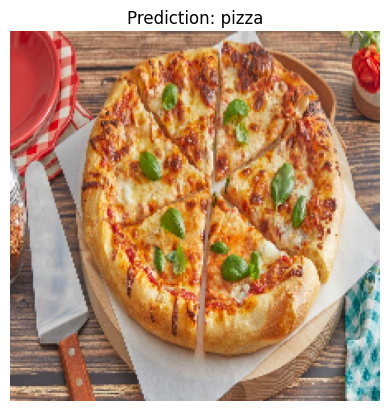

In [53]:
make_pred(model_9,"cheese_pizza.jpg",class_names)

In [5]:
#That was a success!!! Now let's try doing a multi-class CNN model

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-17 04:13:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.207, 142.250.148.207, 209.85.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  67.4MB/s    in 6.2s    

2024-03-17 04:13:53 (79.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [6]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/10_food_classes_all_data/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


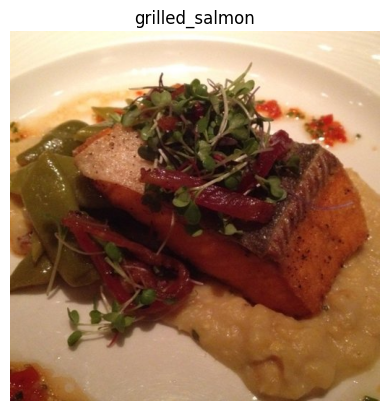

In [9]:
#Step 1 - Become one with the data
# View a random image from the training dataset
img = view_random_image(target_dir="/content/10_food_classes_all_data/train/",
                        target_class=random.choice(class_names))

In [10]:
#Step 2 - Preprocess the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [11]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'categorical',
                                             batch_size = 32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
#Step 3 - Create a CNN model

model_10 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           input_shape = [224,224,3],
           activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),
    Flatten(),
    Dense(10, activation='softmax')
])

#Compile model

model_10.compile(optimizer = Adam(),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = ["accuracy"])

#Fit the model

history_10 = model_10.fit(train_data,
                          epochs = 5,
                          validation_data = test_data,
                          steps_per_epoch = len(train_data),
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 121ms/step - loss: 2.1735 - accuracy: 0.2068 - val_loss: 2.0266 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8177 - accuracy: 0.3735 - val_loss: 1.9312 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.3399 - accuracy: 0.5507 - val_loss: 2.1148 - val_accuracy: 0.2952
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 0.7569 - accuracy: 0.7543 - val_loss: 2.7207 - val_accuracy: 0.2672
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 0.3171 - accuracy: 0.9055 - val_loss: 3.9260 - val_accuracy: 0.2516


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

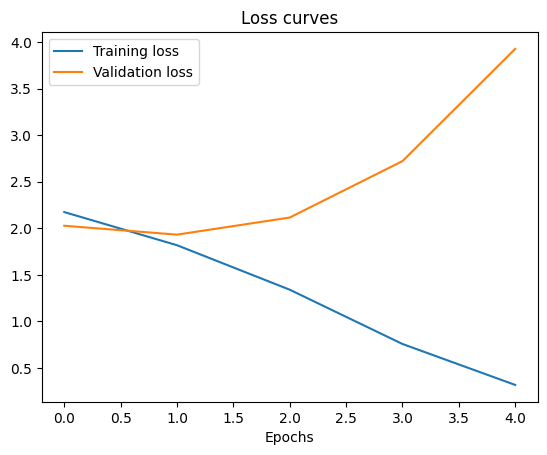

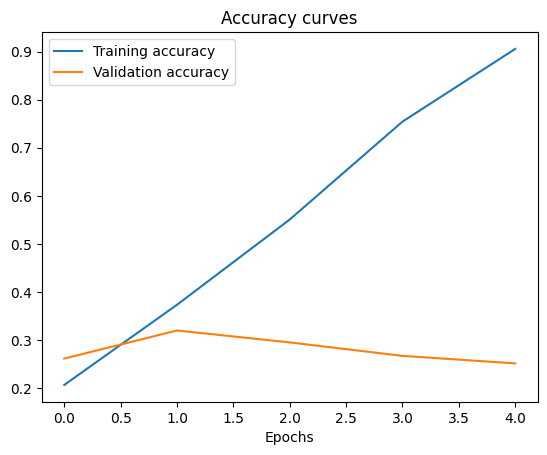

In [16]:
plot_loss_accuracy(history_10)

In [21]:
#Reconfig the make_pred function for multi-class problems
def make_pred(model, filename, class_names):
  img = load_preprocess_img(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 1s 748ms/step


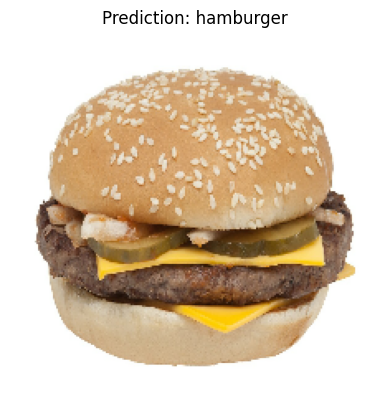

In [22]:
make_pred(model = model_10,
          filename = 'hamburger.jpeg',
          class_names = class_names)

1/1 [==============================] - 0s 30ms/step


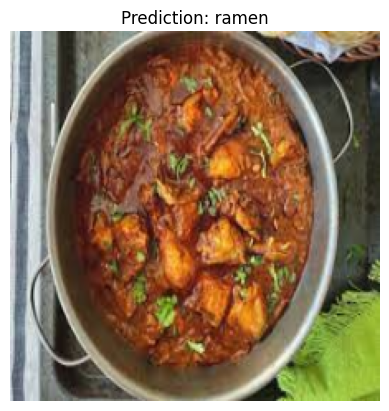

In [23]:
make_pred(model = model_10,
          filename = 'chicken curry.jpeg',
          class_names = class_names)

1/1 [==============================] - 0s 29ms/step


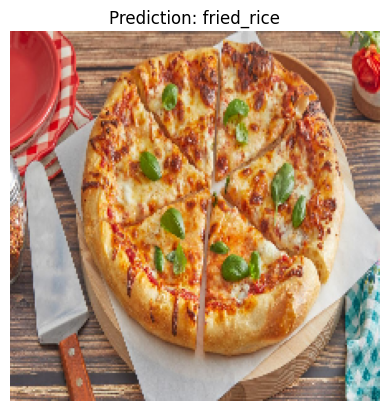

In [25]:
make_pred(model = model_10,
          filename = 'cheese-pizza.jpg',
          class_names = class_names)

In [26]:
#Save the model

model_10.save("model_10_trained")

In [27]:
loaded_model_10 = tf.keras.models.load_model("model_10_trained")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 3.9260 - accuracy: 0.2516


[3.9259862899780273, 0.2515999972820282]

In [28]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 3.9260 - accuracy: 0.2516


[3.9259867668151855, 0.2515999972820282]

In [29]:
!zip -r /content/model_10_trained.zip /content/model_10_trained

  adding: content/model_10_trained/ (stored 0%)
  adding: content/model_10_trained/variables/ (stored 0%)
  adding: content/model_10_trained/variables/variables.index (deflated 65%)
  adding: content/model_10_trained/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model_10_trained/assets/ (stored 0%)
  adding: content/model_10_trained/keras_metadata.pb (deflated 91%)
  adding: content/model_10_trained/fingerprint.pb (stored 0%)
  adding: content/model_10_trained/saved_model.pb (deflated 88%)
